<a href="https://colab.research.google.com/github/SumitP31/edict-heart/blob/main/pqrst_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [87]:
# Load CSV file
df = pd.read_csv("Combo.csv")
df = df.sample(frac=1).reset_index(drop=True)
# View first few rows
print(df.head())




   QRS   P   T     RR labels
0   24  85  26  322.0      R
1   43   0   0  256.0     AF
2   49  60   0  333.0     PR
3   52  47   0  326.0     PR
4   42   0   0  282.0     AF


In [88]:
# Get the name of the last column
last_col = df.columns[-1]

# Remove rows where the last column contains a specific string
df = df[df[last_col] != '+']

In [89]:
last_col = df.columns[-1]

# Remove rows where the last column contains a specific string
# df = df[df[last_col] != 'V']
df = df[df[last_col] != 'R']
# df = df[df[last_col] != 'N']
df = df[df[last_col] != 'A']
df = df[df[last_col] != 'F']
df = df[df[last_col] != 'E']
df = df[df[last_col] != 'a']
df = df[df[last_col] != 'j']


In [90]:
# Convert to NumPy array (optional)
X = df.iloc[:, :-1].values  # Features (all columns except last)
en = df.iloc[:, -1].values   # Target variable (last column)
print(en)

['AF' 'PR' 'PR' ... 'AF' 'AF' 'AF']


In [91]:
print(f' \n {np.unique(en)}')

 
 ['AF' 'MSB' 'N' 'PR' 'V']


In [92]:
X[:,-1].shape

(5284,)

In [93]:
# Initialize encoder
encoder = LabelEncoder()
y = encoder.fit_transform(en) # A = 0 ; N = 1 ; ~ = 2
print(f'{y}  \n {np.unique(y)}')

[0 3 3 ... 0 0 0]  
 [0 1 2 3 4]


In [94]:
te_d = np.column_stack((X, y))

print(y)
print(te_d)

[0 3 3 ... 0 0 0]
[[ 43.   0.   0. 256.   0.]
 [ 49.  60.   0. 333.   3.]
 [ 52.  47.   0. 326.   3.]
 ...
 [ 42.   0.   0. 219.   0.]
 [ 55.   0.   0. 226.   0.]
 [ 42.   0.   0. 274.   0.]]


In [95]:
# custom_headers = "p,q,t,r,output"
# np.savetxt("output.csv", te_d, delimiter=",", header=custom_headers, comments='', fmt='%d')

In [96]:
# y[y == 2] = 1

In [97]:
# for i in range(len(y)):
#   if(y[i] == 3):
#     print(f'{i}\n')

In [98]:
# print(X[1586,0])

In [99]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')
X, y = oversample.fit_resample(X, y)
oversample = RandomOverSampler(sampling_strategy='minority')
X, y = oversample.fit_resample(X, y)

print(X.shape)
print(y.shape)

(9521, 4)
(9521,)


In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=29)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7140, 4)
(7140,)
(2381, 4)
(2381,)


In [111]:
import tensorflow as tf

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation=tf.nn.sigmoid))
# model.add(tf.keras.layers.Dense(8, activation=tf.nn.sigmoid))
model.add(tf.keras.layers.Dense(7, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=80)

Epoch 1/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2580 - loss: 1.8794 - val_accuracy: 0.2621 - val_loss: 1.5995
Epoch 2/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4114 - loss: 1.5674 - val_accuracy: 0.6812 - val_loss: 1.4912
Epoch 3/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6643 - loss: 1.4753 - val_accuracy: 0.7438 - val_loss: 1.4020
Epoch 4/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6789 - loss: 1.3805 - val_accuracy: 0.7451 - val_loss: 1.3024
Epoch 5/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6675 - loss: 1.2821 - val_accuracy: 0.7451 - val_loss: 1.2050
Epoch 6/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7409 - loss: 1.1755 - val_accuracy: 0.7446 - val_loss: 1.1167
Epoch 7/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7444 - loss: 1.0926 - val_accuracy: 0.7665 - val_loss: 1.0438
Epoch 8/80
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7662 - loss: 1.0227 - val_accuracy: 0.

In [112]:
# Extract all layer weights
for layer in model.layers:
    weights = layer.get_weights()  # List of NumPy arrays (weights & biases)
    print(f"Layer: {layer.name}")
    for w in weights:
        print(w.shape)  # Shape of weight matrices

Layer: flatten_6
Layer: dense_17
(4, 10)
(10,)
Layer: dense_18
(10, 7)
(7,)


In [113]:
# weights, biases = model.get_layer("dense_18").get_weights()
# print("Weights:\n", weights)
# print("Biases:\n", biases)

In [114]:
# # for laye in model.layers:
# weights, biases = model.get_layer("dense_19").get_weights()
# print("Weights:\n", weights)
# print("Biases:\n", biases)

In [115]:
weightList = []
biasList = []
for i in range(1,len(model.layers)):
  weights = model.layers[i].get_weights()[0]
  weightList.append((weights.T).tolist())
  bias = [[float(b)] for b in model.layers[i].get_weights()[1]]
  biasList.append(bias)

In [116]:
import json
data = {"weights": weightList, "biases": biasList}
f = open("weights.txt", "w")
json.dump(data, f)
f.close()

In [117]:
predict = np.argmax(model.predict(X_test), axis=-1)
print(f'predict: {predict}')
print(f'y_test: {y_test}')

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
predict: [1 1 0 ... 1 0 0]
y_test: [1 1 0 ... 1 0 0]


(<Figure size 500x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

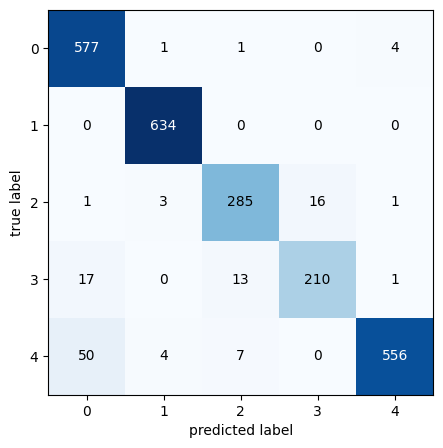

In [118]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, predict)
plot_confusion_matrix(conf_mat=mat, figsize=(5, 5))

### Automate FPGA code

In [119]:
# !pip install zynet

In [120]:
from zynet import utils
from zynet import zynet

def genMnistZynet(dataWidth, sigmoidSize, weightIntSize,inputIntSize):
  model = zynet.model()
  model.add(zynet.layer("flatten", 3))
  model.add(zynet.layer("Dense",5,"sigmoid"))
  model.add(zynet.layer("Dense",2,"softmax"))
  weightArray = utils.genWeightArray('weights.txt')
  biasArray = utils.genBiasArray('weights.txt')
  model.compile(pretrained='Yes', weights = weightArray, biases = biasArray, dataWidth = dataWidth, weightIntSize = weightIntSize, inputIntSize = inputIntSize, sigmoidSize = sigmoidSize)
  zynet.makeXilinxProject('ecg_ann', 'xc7a100tcsg324-1')



ModuleNotFoundError: No module named 'zynet'

In [ ]:
genMnistZynet(dataWidth=16,sigmoidSize=10,weightIntSize=3,inputIntSize=2)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cd /content/src
!zip -r dataset.zip fpga/

In [ ]:
from google.colab import files
files.download('dataset.zip')

In [ ]:
!cd /content/